tesis

In [25]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install plotly
!pip install scikit-learn
!pip install xgboost
!pip install imbalanced-learn
!pip install lime
!pip install shap


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 8.8 MB/s eta 0:00:00
Using 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

file_path = "wgm_full_wave2_public_file_final.csv"  
df = pd.read_csv(file_path)

df = df.sample(n=5000,  random_state=42)

df_clean = df.copy()

def map_variables(df):
    """
    Aplica el mapeo de códigos numéricos a valores legibles en el dataset del Wellcome Global Monitor.

    Args:
        df (DataFrame): DataFrame original con variables codificadas numéricamente.

    Returns:
        DataFrame: DataFrame con variables mapeadas a valores legibles.
    """
    # --- Definir diccionarios de mapeo ---
    gender_mapping = {1: 'Male', 2: 'Female'}
    education_mapping = {
        1: 'Primary_or_less', 
        2: 'Secondary', 
        3: 'Tertiary'
    }
    income_mapping = {
        1: 'Poorest_20%',
        2: 'Second_20%',
        3: 'Middle_20%',
        4: 'Fourth_20%',
        5: 'Richest_20%'
    }
    subjective_income_mapping = {
        1: 'Living_comfortably',
        2: 'Getting_by',
        3: 'Finding_difficult',
        4: 'Very_difficult',
        5: 'DK',
        6: 'Refused'
    }
    employment_mapping = {
        1: 'Full_time_employed_employer',
        2: 'Full_time_self_employed',
        3: 'Part_time_no_fulltime_needed',
        4: 'Unemployed',
        5: 'Part_time_wants_fulltime',
        6: 'Out_of_workforce'
    }
    mh7a_mapping = {1: 'Yes', 2: 'No', 99: 'DK/Refused'}

    # --- Aplicar mapeos ---
    df = df.copy()

    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].map(gender_mapping)
    if 'Education' in df.columns:
        df['Education'] = df['Education'].map(education_mapping)
    if 'Household_Income' in df.columns:
        df['Household_Income'] = df['Household_Income'].map(income_mapping)
    if 'Subjective_Income' in df.columns:
        df['Subjective_Income'] = df['Subjective_Income'].map(subjective_income_mapping)
    if 'EMP_2010' in df.columns:
        df['EMP_2010'] = df['EMP_2010'].map(employment_mapping)
    if 'MH7A' in df.columns:
        df['MH7A'] = df['MH7A'].map(mh7a_mapping)

    return df


df_clean = map_variables(df_clean)


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\1407158565.py:7: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\1672335249.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)
C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\1672335249.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)
C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\1672335249.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=15)


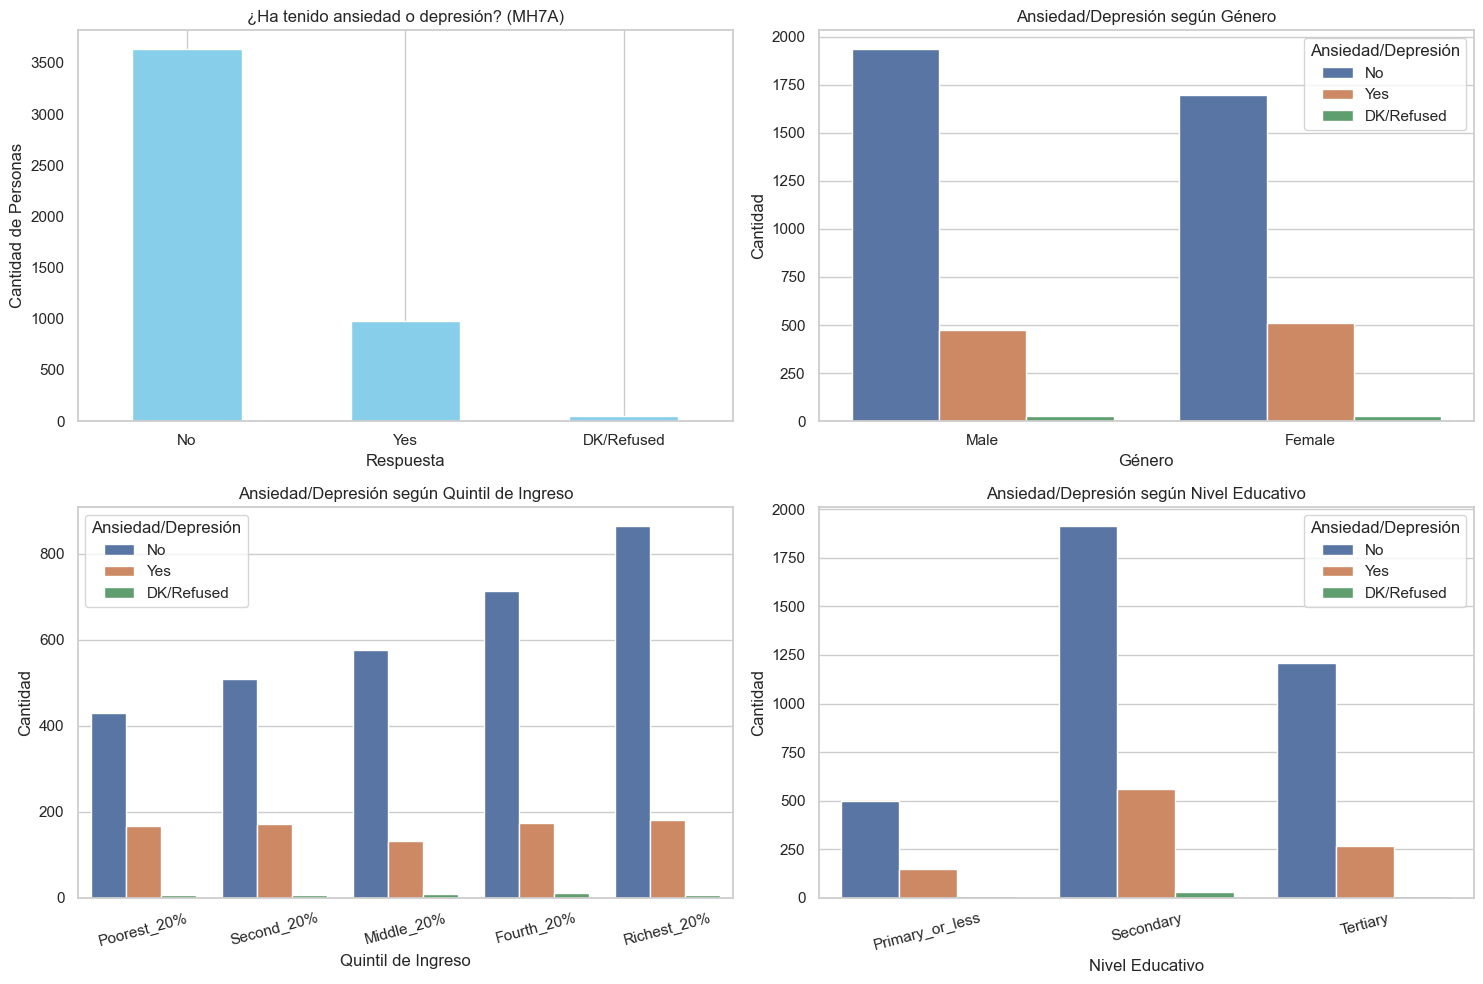

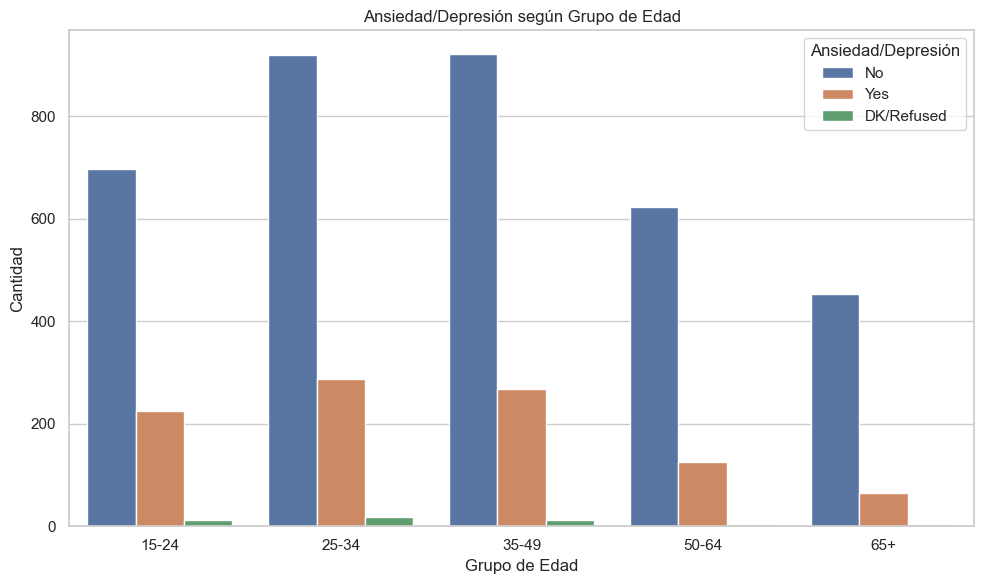

In [2]:
mh7a_counts = df_clean['MH7A'].value_counts()

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 filas x 2 columnas

# --- 2.1 Distribución general de ansiedad/depresión ---
mh7a_counts = df_clean['MH7A'].value_counts()
mh7a_counts.plot(kind='bar', color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title("¿Ha tenido ansiedad o depresión? (MH7A)")
axes[0, 0].set_xlabel("Respuesta")
axes[0, 0].set_ylabel("Cantidad de Personas")
axes[0, 0].grid(axis='y')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# --- 2.2 Distribución por Género ---
sns.countplot(data=df_clean, x='Gender', hue='MH7A', ax=axes[0, 1])
axes[0, 1].set_title("Ansiedad/Depresión según Género")
axes[0, 1].set_xlabel("Género")
axes[0, 1].set_ylabel("Cantidad")
axes[0, 1].legend(title='Ansiedad/Depresión')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# --- 2.3 Distribución por Ingresos ---
sns.countplot(
    data=df_clean,
    x='Household_Income',
    hue='MH7A',
    order=['Poorest_20%', 'Second_20%', 'Middle_20%', 'Fourth_20%', 'Richest_20%'],
    ax=axes[1, 0]
)
axes[1, 0].set_title("Ansiedad/Depresión según Quintil de Ingreso")
axes[1, 0].set_xlabel("Quintil de Ingreso")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend(title='Ansiedad/Depresión')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=15)

sns.countplot(
    data=df_clean,
    x='Education',
    hue='MH7A',
    order=['Primary_or_less', 'Secondary', 'Tertiary'],
    ax=axes[1, 1]
)
axes[1, 1].set_title("Ansiedad/Depresión según Nivel Educativo")
axes[1, 1].set_xlabel("Nivel Educativo")
axes[1, 1].set_ylabel("Cantidad")
axes[1, 1].legend(title='Ansiedad/Depresión')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=15)

plt.tight_layout()
plt.show()


bins = [15, 24, 34, 49, 64, 100]
labels = ['15-24', '25-34', '35-49', '50-64', '65+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=True)

# Gráfico aparte para Edad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Age_Group', hue='MH7A', order=labels)
plt.title("Ansiedad/Depresión según Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Cantidad")
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

In [3]:
print(df_clean.columns.tolist())

['COUNTRYNEW', 'WPID_RANDOM', 'WGT', 'PROJWT', 'FIELD_DATE', 'YEAR_WAVE', 'W1', 'W2', 'W3', 'W4', 'W5A', 'W5B', 'W5C', 'W5D', 'W5E', 'W5F', 'W5G', 'W6', 'W7A', 'W7B', 'W7C', 'W8', 'W9', 'W10', 'W11A', 'W11B', 'MH2A', 'MH2B', 'W13', 'W14', 'W15', 'W15_1A', 'W15_1B', 'W15_1C', 'W15_1D', 'W15_1E', 'W15_2A', 'W15_2B', 'MH1', 'MH3A', 'MH3B', 'MH3C', 'MH3D', 'MH4A', 'MH4B', 'MH5', 'MH6', 'MH7A', 'MH7B', 'MH7B_2', 'MH7C', 'MH8A', 'MH8B', 'MH8C', 'MH8D', 'MH8E', 'MH8F', 'MH8G', 'MH8H', 'MH9A', 'MH9B', 'MH9C', 'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H', 'W27', 'W28', 'W29', 'W30', 'WP21757', 'WP21758', 'WP21759', 'WP21760', 'WP21761', 'WP21768', 'age_mh', 'Age', 'age_var1', 'age_var2', 'age_var3', 'Gender', 'Education', 'Household_Income', 'Global11Regions', 'wbi', 'Subjective_Income', 'EMP_2010', 'Age_Group']


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\1040547740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_age_analysis, x='MH7A', y='Age', palette='pastel')


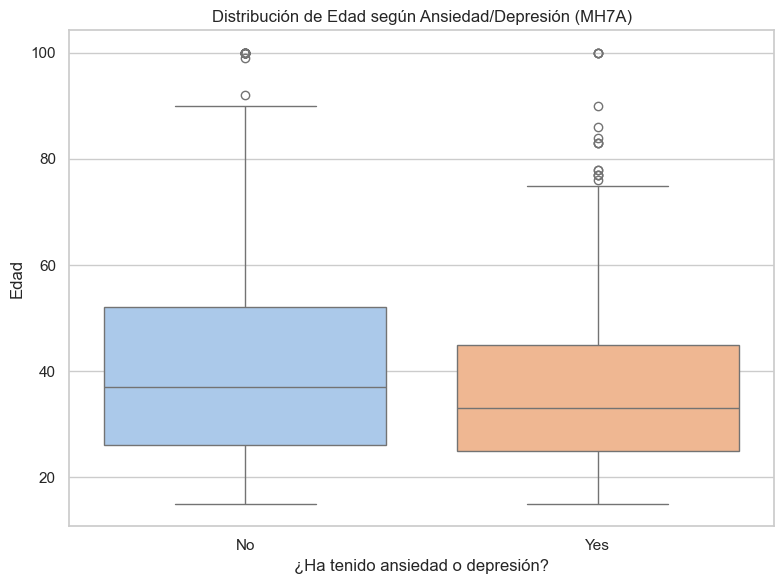

Media de Edad por Grupo:
MH7A
No     40.59626
Yes    36.70102
Name: Age, dtype: float64

Resultados del t-test de comparación de medias:
Estadístico t: -6.7656
Valor p: 1.8144e-11

✅ Hay diferencia estadísticamente significativa entre las edades de los dos grupos.


In [4]:
# --- 1. Filtrar datos válidos ---
# Tomar solo las personas que respondieron 'Yes' o 'No' en MH7A
df_age_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 2. Boxplot: Comparar Edad según ansiedad/depresión ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_age_analysis, x='MH7A', y='Age', palette='pastel')
plt.title("Distribución de Edad según Ansiedad/Depresión (MH7A)")
plt.xlabel("¿Ha tenido ansiedad o depresión?")
plt.ylabel("Edad")
plt.tight_layout()
plt.show()

# --- 3. Media de edad para cada grupo ---
mean_ages = df_age_analysis.groupby('MH7A')['Age'].mean()
print("Media de Edad por Grupo:")
print(mean_ages)

# --- 4. Prueba estadística t-test: comparar medias ---
# Separar edades por grupo
ages_yes = df_age_analysis[df_age_analysis['MH7A'] == 'Yes']['Age']
ages_no = df_age_analysis[df_age_analysis['MH7A'] == 'No']['Age']

# Realizar t-test de medias independientes (no asumimos varianzas iguales)
t_stat, p_value = ttest_ind(ages_yes, ages_no, equal_var=False)

print("\nResultados del t-test de comparación de medias:")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4e}")

# --- 5. Interpretación sugerida ---
if p_value < 0.05:
    print("\n✅ Hay diferencia estadísticamente significativa entre las edades de los dos grupos.")
else:
    print("\n⚠️ No se encontró diferencia significativa entre las edades de los dos grupos.")

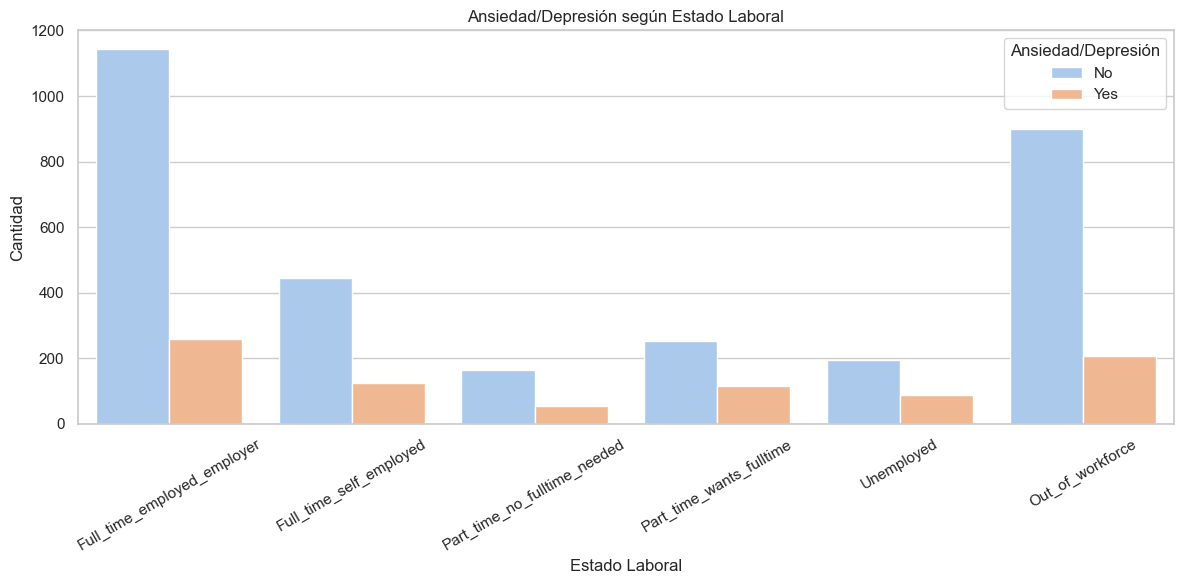


Resultados de la Prueba Chi-Cuadrado:
Estadístico Chi2: 51.4196
Valor p: 7.0952e-10
Grados de libertad: 5

✅ Existe una asociación estadísticamente significativa entre el estado laboral y la presencia de ansiedad/depresión.


In [5]:
from scipy.stats import chi2_contingency


# --- 1. Filtrar datos válidos ---
# Solo registros válidos para MH7A (Yes o No)
df_emp_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 2. Gráfico de barras: Estado Laboral vs Ansiedad/Depresión ---

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_emp_analysis,
    x='EMP_2010',
    hue='MH7A',
    order=[
        'Full_time_employed_employer',
        'Full_time_self_employed',
        'Part_time_no_fulltime_needed',
        'Part_time_wants_fulltime',
        'Unemployed',
        'Out_of_workforce'
    ],
    palette='pastel'
)
plt.title("Ansiedad/Depresión según Estado Laboral")
plt.xlabel("Estado Laboral")
plt.ylabel("Cantidad")
plt.xticks(rotation=30)
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

# --- 3. (Opcional pero recomendado) Prueba Chi-Cuadrado para ver si la relación es significativa ---

# Crear tabla de contingencia
contingency_table = pd.crosstab(df_emp_analysis['EMP_2010'], df_emp_analysis['MH7A'])

# Aplicar prueba chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nResultados de la Prueba Chi-Cuadrado:")
print(f"Estadístico Chi2: {chi2:.4f}")
print(f"Valor p: {p_value:.4e}")
print(f"Grados de libertad: {dof}")

# --- 4. Interpretación sugerida ---
if p_value < 0.05:
    print("\n✅ Existe una asociación estadísticamente significativa entre el estado laboral y la presencia de ansiedad/depresión.")
else:
    print("\n⚠️ No se encontró asociación estadísticamente significativa entre estado laboral y ansiedad/depresión.")

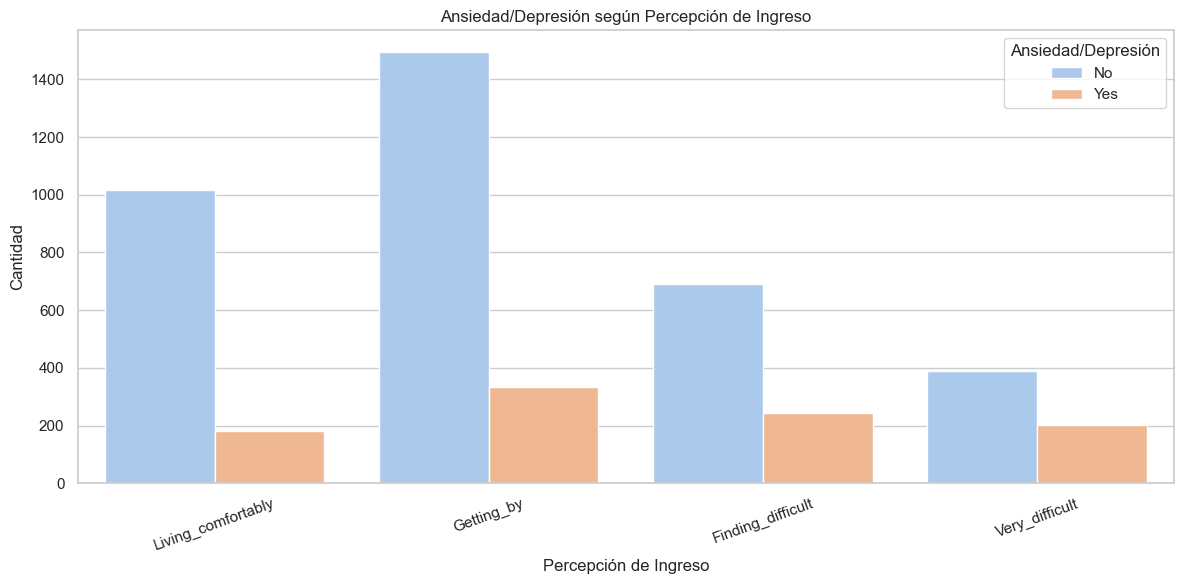


Resultados de la Prueba Chi-Cuadrado (Subjective Income):
Estadístico Chi2: 107.8110
Valor p: 1.1885e-21
Grados de libertad: 5

✅ Existe una asociación estadísticamente significativa entre percepción de ingreso y presencia de ansiedad/depresión.


In [6]:
# --- 1. Filtrar datos válidos ---
# Solo registros válidos para MH7A (Yes o No)
df_income_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 2. Gráfico de barras: Percepción de ingreso vs Ansiedad/Depresión ---

plt.figure(figsize=(12, 6))
sns.countplot(
    data=df_income_analysis,
    x='Subjective_Income',
    hue='MH7A',
    order=[
        'Living_comfortably',
        'Getting_by',
        'Finding_difficult',
        'Very_difficult'
    ],
    palette='pastel'
)
plt.title("Ansiedad/Depresión según Percepción de Ingreso")
plt.xlabel("Percepción de Ingreso")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

# --- 3. Prueba Chi-Cuadrado para ver si la relación es significativa ---

# Crear tabla de contingencia
contingency_table_income = pd.crosstab(df_income_analysis['Subjective_Income'], df_income_analysis['MH7A'])

# Aplicar prueba chi-cuadrado
chi2_income, p_value_income, dof_income, expected_income = chi2_contingency(contingency_table_income)

print("\nResultados de la Prueba Chi-Cuadrado (Subjective Income):")
print(f"Estadístico Chi2: {chi2_income:.4f}")
print(f"Valor p: {p_value_income:.4e}")
print(f"Grados de libertad: {dof_income}")

# --- 4. Interpretación sugerida ---
if p_value_income < 0.05:
    print("\n✅ Existe una asociación estadísticamente significativa entre percepción de ingreso y presencia de ansiedad/depresión.")
else:
    print("\n⚠️ No se encontró asociación estadísticamente significativa entre percepción de ingreso y ansiedad/depresión.")

C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\3879676538.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region_analysis['Global11Regions'] = df_region_analysis['Global11Regions'].map(region_mapping)


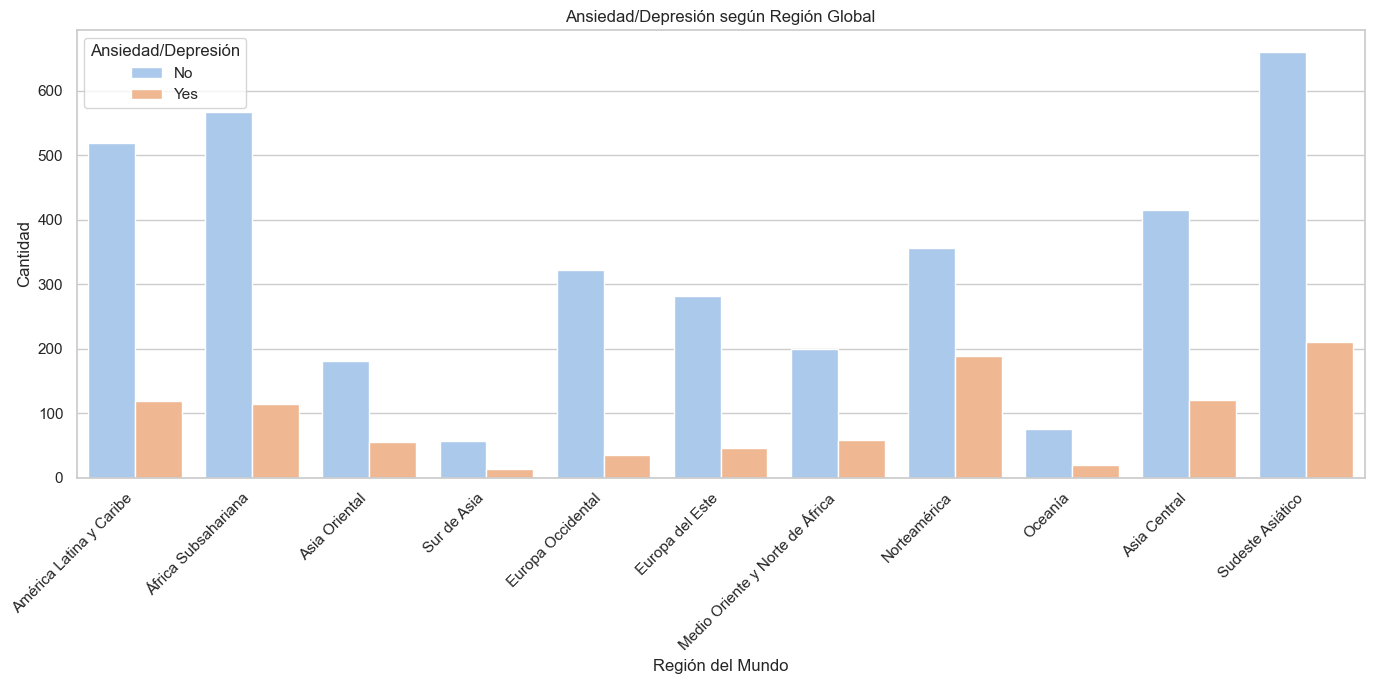


Resultados de la Prueba Chi-Cuadrado (Global11Regions):
Estadístico Chi2: 113.0095
Valor p: 1.3174e-19
Grados de libertad: 10

✅ Existe una asociación estadísticamente significativa entre la región del mundo y la presencia de ansiedad/depresión.


In [7]:
# --- 1. Preparar datos ---
# Solo registros válidos
df_region_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 2. Mapeo de Global11Regions a nombres de regiones ---

# Crear diccionario de regiones
region_mapping = {
    1: 'América Latina y Caribe',
    2: 'África Subsahariana',
    3: 'Asia Oriental',
    4: 'Sur de Asia',
    5: 'Europa Occidental',
    6: 'Europa del Este',
    7: 'Medio Oriente y Norte de África',
    8: 'Norteamérica',
    9: 'Oceanía',
    10: 'Asia Central',
    11: 'Sudeste Asiático'
}

# Aplicar mapeo
df_region_analysis['Global11Regions'] = df_region_analysis['Global11Regions'].map(region_mapping)

# --- 3. Gráfico de barras actualizado ---

plt.figure(figsize=(14, 7))
sns.countplot(
    data=df_region_analysis,
    x='Global11Regions',
    hue='MH7A',
    order=[
        'América Latina y Caribe',
        'África Subsahariana',
        'Asia Oriental',
        'Sur de Asia',
        'Europa Occidental',
        'Europa del Este',
        'Medio Oriente y Norte de África',
        'Norteamérica',
        'Oceanía',
        'Asia Central',
        'Sudeste Asiático'
    ],
    palette='pastel'
)
plt.title("Ansiedad/Depresión según Región Global")
plt.xlabel("Región del Mundo")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Ansiedad/Depresión')
plt.tight_layout()
plt.show()

# --- 4. Prueba Chi-Cuadrado ---

# Crear tabla de contingencia
contingency_table_region = pd.crosstab(df_region_analysis['Global11Regions'], df_region_analysis['MH7A'])

# Aplicar prueba chi-cuadrado
chi2_region, p_value_region, dof_region, expected_region = chi2_contingency(contingency_table_region)

print("\nResultados de la Prueba Chi-Cuadrado (Global11Regions):")
print(f"Estadístico Chi2: {chi2_region:.4f}")
print(f"Valor p: {p_value_region:.4e}")
print(f"Grados de libertad: {dof_region}")

# Interpretación sugerida
if p_value_region < 0.05:
    print("\n✅ Existe una asociación estadísticamente significativa entre la región del mundo y la presencia de ansiedad/depresión.")
else:
    print("\n⚠️ No se encontró asociación estadísticamente significativa entre región del mundo y ansiedad/depresión.")

C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\2092542119.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_edu_region_analysis['Global11Regions'] = df_edu_region_analysis['Global11Regions'].map(region_mapping)


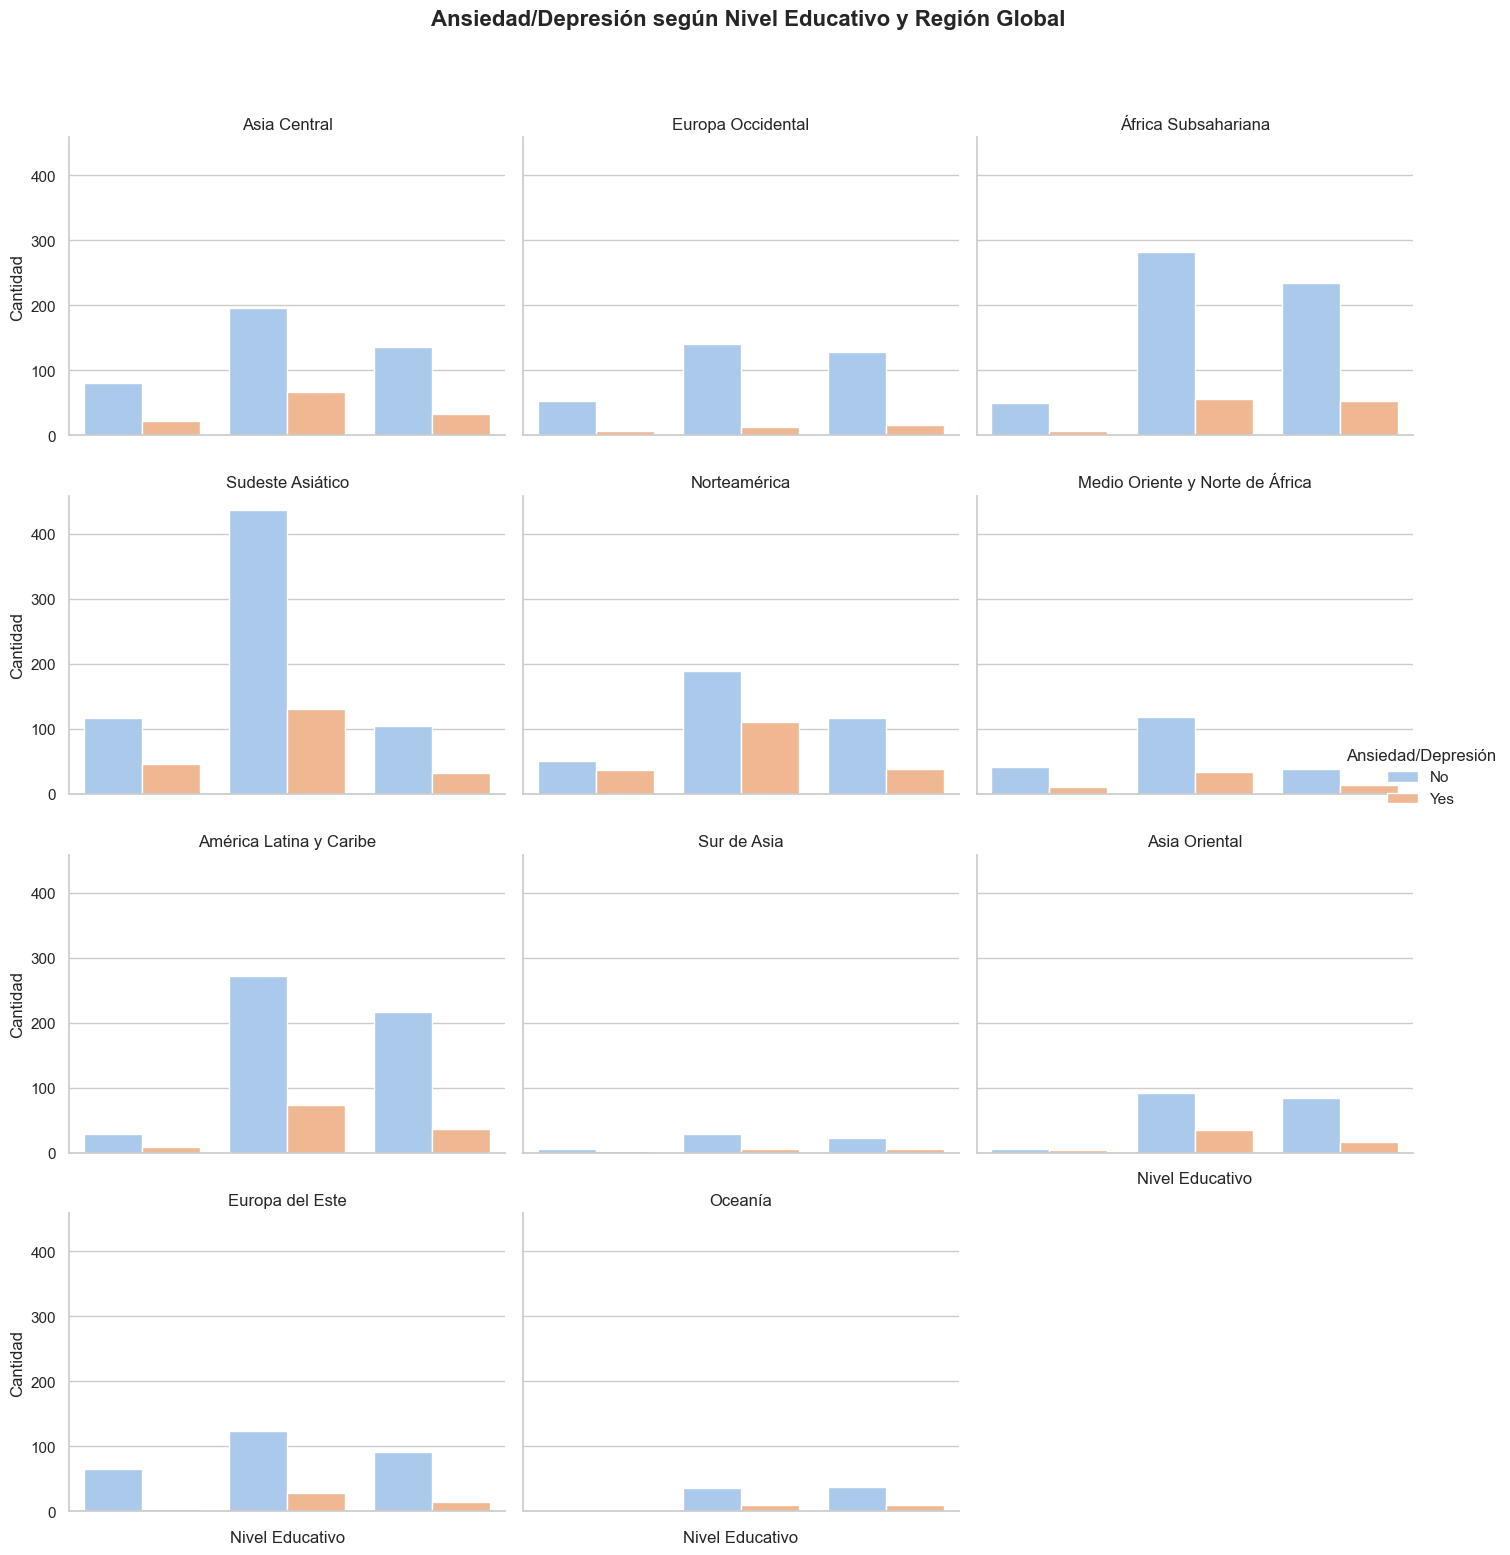

In [8]:
# --- 1. Preparar datos ---
# Usar solo registros válidos
df_edu_region_analysis = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 2. Mapeo de Global11Regions si aún no se ha hecho ---

# (Asegúrate de tener este mapeo activo, si no ya lo aplicaste antes)
region_mapping = {
    1: 'América Latina y Caribe',
    2: 'África Subsahariana',
    3: 'Asia Oriental',
    4: 'Sur de Asia',
    5: 'Europa Occidental',
    6: 'Europa del Este',
    7: 'Medio Oriente y Norte de África',
    8: 'Norteamérica',
    9: 'Oceanía',
    10: 'Asia Central',
    11: 'Sudeste Asiático'
}
df_edu_region_analysis['Global11Regions'] = df_edu_region_analysis['Global11Regions'].map(region_mapping)

# --- 3. Gráfico tipo FacetGrid ---

# Crear el FacetGrid
g = sns.catplot(
    data=df_edu_region_analysis,
    x='Education',
    hue='MH7A',
    col='Global11Regions',
    kind='count',
    col_wrap=3,           # Número de gráficas por fila
    height=4,             # Altura de cada subgráfico
    aspect=1.2,           # Relación ancho/alto
    palette='pastel',
    order=['Primary_or_less', 'Secondary', 'Tertiary']  # Orden lógico de niveles educativos
)

# Ajustar detalles
g.set_titles("{col_name}")
g.set_axis_labels("Nivel Educativo", "Cantidad")
g.set_xticklabels(rotation=20)
g._legend.set_title('Ansiedad/Depresión')

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ansiedad/Depresión según Nivel Educativo y Región Global", fontsize=16, fontweight='bold')

plt.show()


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\1296811949.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Asia Central' 'Europa Occidental' 'África Subsahariana' ...
 'Europa Occidental' 'África Subsahariana' 'Asia Oriental']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_region_map.loc[:, 'Global11Regions'] = df_region_map['Global11Regions'].map(region_mapping)


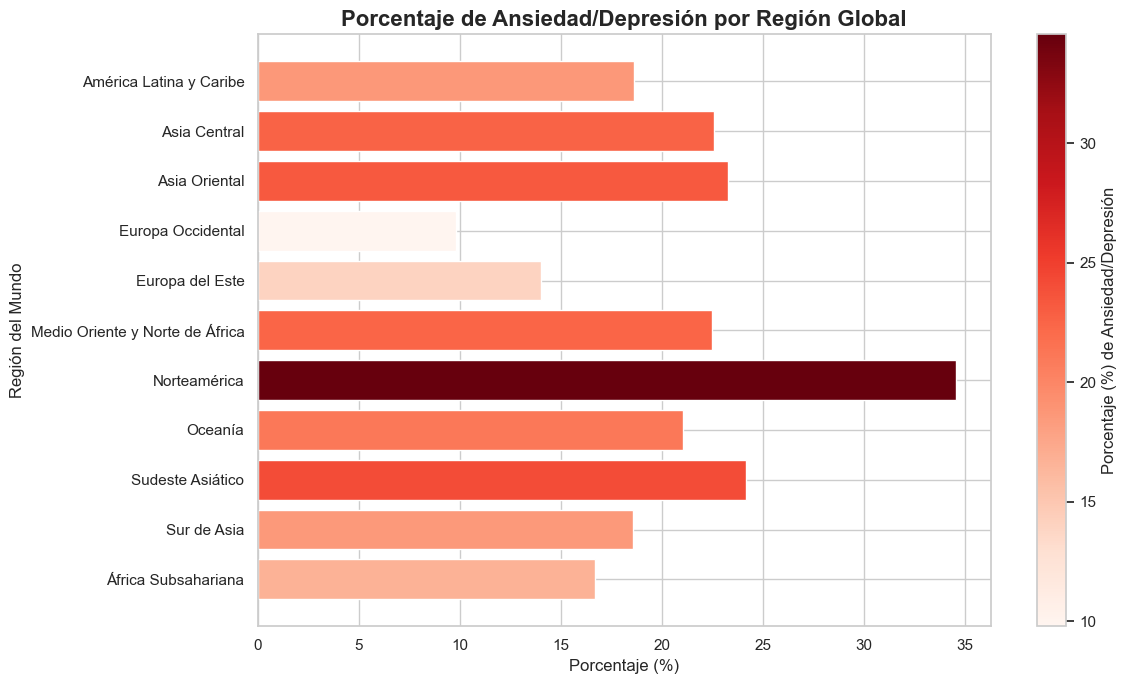

In [9]:
import matplotlib.colors as mcolors

df_region_map = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# Mapeo seguro con .loc para evitar warnings
region_mapping = {
    1: 'América Latina y Caribe',
    2: 'África Subsahariana',
    3: 'Asia Oriental',
    4: 'Sur de Asia',
    5: 'Europa Occidental',
    6: 'Europa del Este',
    7: 'Medio Oriente y Norte de África',
    8: 'Norteamérica',
    9: 'Oceanía',
    10: 'Asia Central',
    11: 'Sudeste Asiático'
}
df_region_map.loc[:, 'Global11Regions'] = df_region_map['Global11Regions'].map(region_mapping)

# Agrupar para calcular porcentaje de ansiedad/depresión
region_summary = (
    df_region_map.groupby('Global11Regions')['MH7A']
    .value_counts(normalize=True)
    .rename('percentage')
    .mul(100)
    .reset_index()
)

region_yes = region_summary[region_summary['MH7A'] == 'Yes']

# --- 2. Normalizar porcentaje para colores ---
norm = plt.Normalize(region_yes['percentage'].min(), region_yes['percentage'].max())
colors = [plt.cm.Reds(norm(p)) for p in region_yes['percentage']]

# --- 3. Crear figura y eje manualmente ---
fig, ax = plt.subplots(figsize=(12, 7))

# Crear el gráfico manualmente para poder controlar el eje
bars = ax.barh(
    region_yes['Global11Regions'],
    region_yes['percentage'],
    color=colors
)

# Crear y agregar la barra de colores
sm = plt.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])  # Obligatorio para matplotlib>=3.1
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Porcentaje (%) de Ansiedad/Depresión', fontsize=12)

# Ajustes de la gráfica
ax.set_title("Porcentaje de Ansiedad/Depresión por Región Global", fontsize=16, fontweight='bold')
ax.set_xlabel("Porcentaje (%)")
ax.set_ylabel("Región del Mundo")
ax.invert_yaxis()  # Para que la región con más porcentaje quede arriba
plt.tight_layout()
plt.show()

implementacion del modelo


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\3196566847.py:8: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


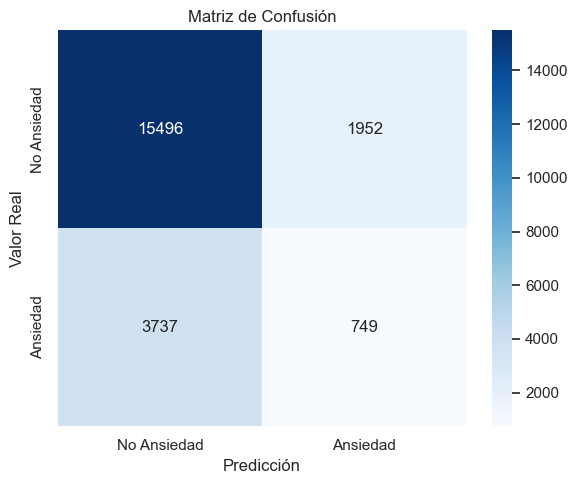


Reporte de Clasificación:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.89      0.84     17448
    Ansiedad       0.28      0.17      0.21      4486

    accuracy                           0.74     21934
   macro avg       0.54      0.53      0.53     21934
weighted avg       0.70      0.74      0.71     21934



In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


file_path = "wgm_full_wave2_public_file_final.csv"  
df = pd.read_csv(file_path)

df_clean = df.copy()

df_clean = map_variables(df_clean)

# Filtrar solo las filas válidas (ansiedad sí/no)
df_model = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])].copy()

# Crear columna 'target' binaria
df_model['target'] = df_model['MH7A'].map({'Yes': 1, 'No': 0})

# Seleccionar variables a usar
features = ['Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income', 'EMP_2010', 'Global11Regions']

# Mantener solo las columnas necesarias
df_model = df_model[features + ['target']]

# Codificar variables categóricas con LabelEncoder
le = LabelEncoder()
for col in ['Gender', 'Education', 'Household_Income', 'Subjective_Income', 'EMP_2010', 'Global11Regions']:
    df_model[col] = le.fit_transform(df_model[col])

# --- 3. Dividir datos ---
X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Entrenar modelo Random Forest ---
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# --- 5. Evaluar el modelo ---
y_pred = model.predict(X_test)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Ansiedad', 'Ansiedad'], 
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Ansiedad', 'Ansiedad']))

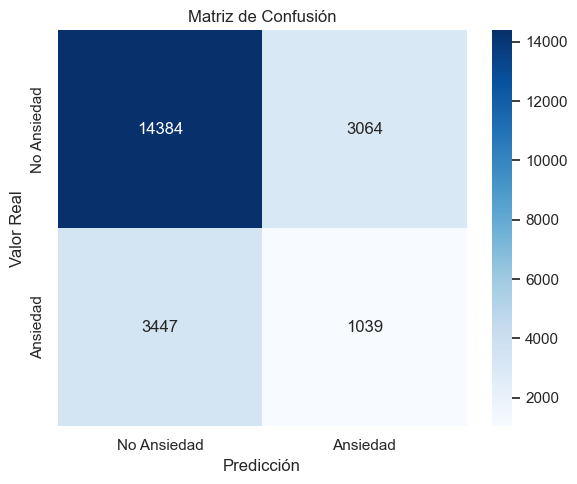


Reporte de Clasificación:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.82      0.82     17448
    Ansiedad       0.25      0.23      0.24      4486

    accuracy                           0.70     21934
   macro avg       0.53      0.53      0.53     21934
weighted avg       0.69      0.70      0.70     21934



In [12]:
model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Ansiedad', 'Ansiedad'], 
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['No Ansiedad', 'Ansiedad']))

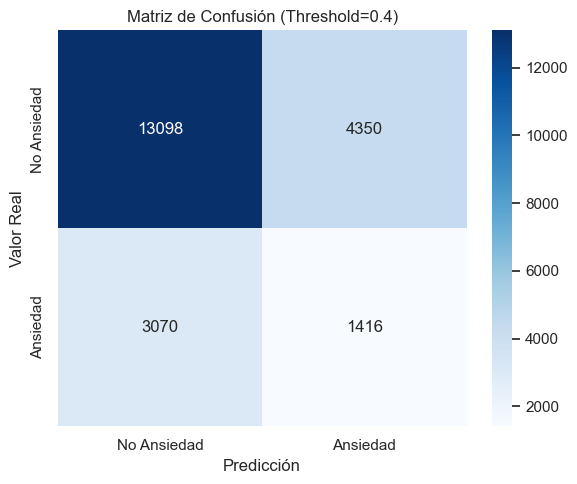


Reporte de Clasificación (Threshold Ajustado):
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.75      0.78     17448
    Ansiedad       0.25      0.32      0.28      4486

    accuracy                           0.66     21934
   macro avg       0.53      0.53      0.53     21934
weighted avg       0.69      0.66      0.68     21934



In [13]:
y_probs = model.predict_proba(X_test)[:, 1]  

threshold = 0.4 

y_pred_adjusted = (y_probs >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred_adjusted)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title(f'Matriz de Confusión (Threshold={threshold})')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación (Threshold Ajustado):")
print(classification_report(y_test, y_pred_adjusted, target_names=['No Ansiedad', 'Ansiedad']))

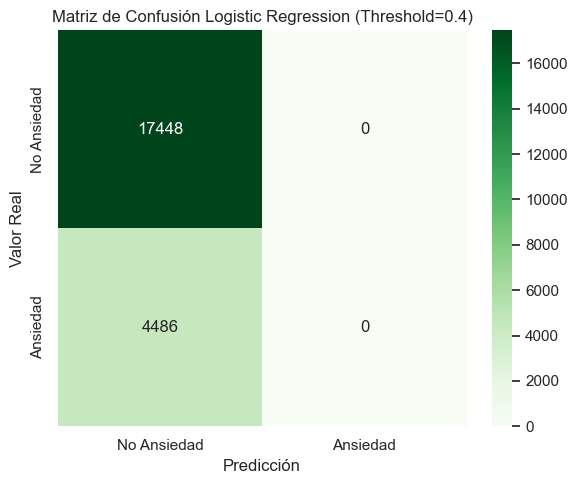


Reporte de Clasificación Logistic Regression:
              precision    recall  f1-score   support

 No Ansiedad       0.80      1.00      0.89     17448
    Ansiedad       0.00      0.00      0.00      4486

    accuracy                           0.80     21934
   macro avg       0.40      0.50      0.44     21934
weighted avg       0.63      0.80      0.70     21934



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\abiel\AppData\Roaming\Python\Py

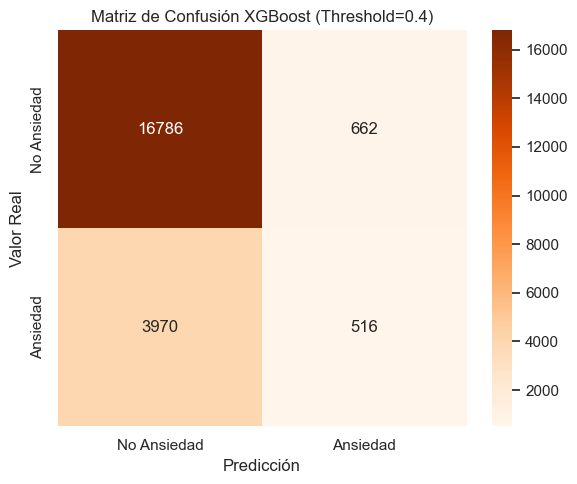


Reporte de Clasificación XGBoost:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.96      0.88     17448
    Ansiedad       0.44      0.12      0.18      4486

    accuracy                           0.79     21934
   macro avg       0.62      0.54      0.53     21934
weighted avg       0.73      0.79      0.74     21934



In [14]:
# -*- coding: utf-8 -*-

# --- Importar librerías necesarias ---
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Logistic Regression ---

# Crear y entrenar modelo
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Predecir probabilidades
y_probs_log = log_model.predict_proba(X_test)[:, 1]

# Ajustar threshold
threshold = 0.4  # Puedes experimentar con 0.35 también
y_pred_log = (y_probs_log >= threshold).astype(int)

# Evaluar
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title(f'Matriz de Confusión Logistic Regression (Threshold={threshold})')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=['No Ansiedad', 'Ansiedad']))

# --- 2. XGBoost Classifier ---

# Crear y entrenar modelo
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predecir probabilidades
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Ajustar threshold
y_pred_xgb = (y_probs_xgb >= threshold).astype(int)

# Evaluar
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title(f'Matriz de Confusión XGBoost (Threshold={threshold})')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

print("\nReporte de Clasificación XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Ansiedad', 'Ansiedad']))


Modelos no lineales como Random Forest y XGBoost presentan mejor capacidad para identificar casos de ansiedad o depresión en contextos de clases desbalanceadas, mientras que modelos lineales como Logistic Regression fallan completamente en la detección de la clase minoritaria.


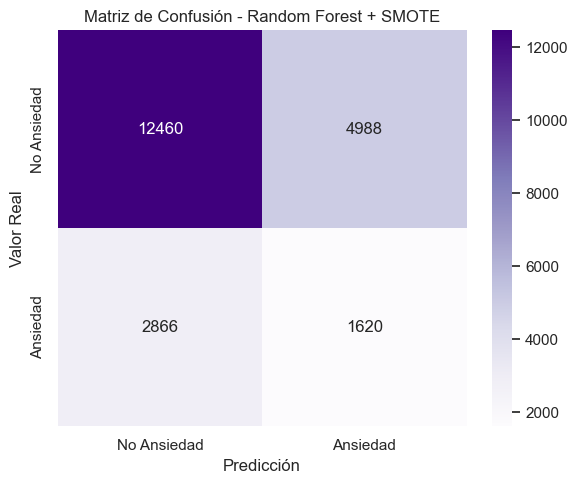


Reporte de Clasificación - Random Forest con SMOTE:
              precision    recall  f1-score   support

 No Ansiedad       0.81      0.71      0.76     17448
    Ansiedad       0.25      0.36      0.29      4486

    accuracy                           0.64     21934
   macro avg       0.53      0.54      0.53     21934
weighted avg       0.70      0.64      0.66     21934



In [16]:
# -*- coding: utf-8 -*-

# --- Importar librerías ---
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Dividir datos normalmente ---
X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Aplicar SMOTE solo en el set de entrenamiento ---
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- 3. Entrenar modelo Random Forest sobre datos balanceados ---
model_smote = RandomForestClassifier(random_state=42, n_estimators=100)
model_smote.fit(X_train_balanced, y_train_balanced)

# --- 4. Predecir sobre el conjunto de prueba normal ---
y_pred_smote = model_smote.predict(X_test)

# --- 5. Evaluar modelo balanceado ---
# Matriz de Confusión
cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Purples',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - Random Forest + SMOTE')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación - Random Forest con SMOTE:")
print(classification_report(y_test, y_pred_smote, target_names=['No Ansiedad', 'Ansiedad']))


C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:14:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


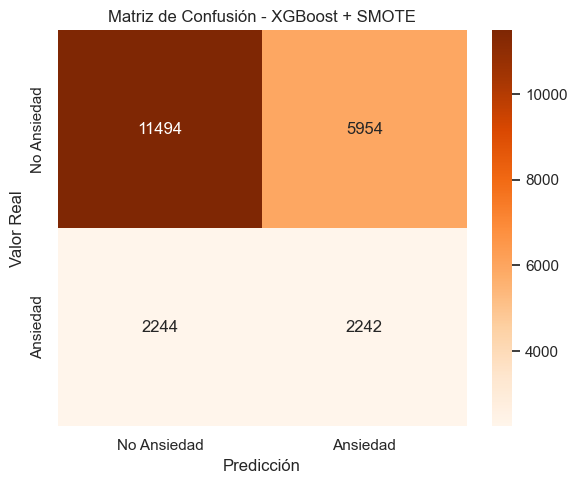


Reporte de Clasificación - XGBoost con SMOTE:
              precision    recall  f1-score   support

 No Ansiedad       0.84      0.66      0.74     17448
    Ansiedad       0.27      0.50      0.35      4486

    accuracy                           0.63     21934
   macro avg       0.56      0.58      0.55     21934
weighted avg       0.72      0.63      0.66     21934



In [17]:
# -*- coding: utf-8 -*-

# --- Importar librerías necesarias ---
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. (Repetimos) Dividir datos normalmente ---
X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Aplicar SMOTE solo en el entrenamiento ---
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- 3. Entrenar modelo XGBoost sobre datos balanceados ---
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_smote.fit(X_train_balanced, y_train_balanced)

# --- 4. Predecir sobre el conjunto de prueba real ---
y_pred_xgb_smote = xgb_model_smote.predict(X_test)

# --- 5. Evaluar ---
# Matriz de Confusión
cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_smote, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost + SMOTE')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación - XGBoost con SMOTE:")
print(classification_report(y_test, y_pred_xgb_smote, target_names=['No Ansiedad', 'Ansiedad']))


C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:14:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


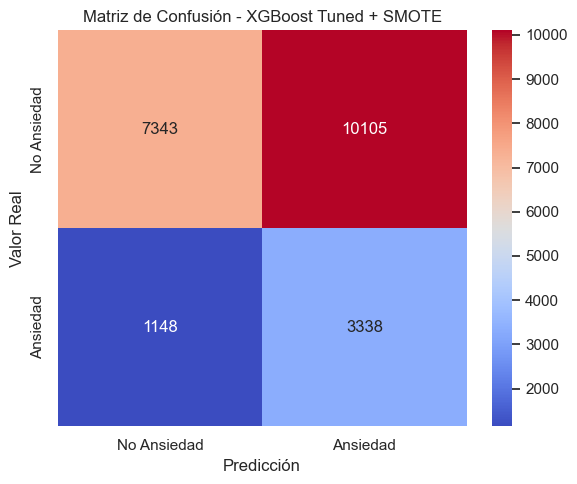


Reporte de Clasificación - XGBoost Tuned + SMOTE:
              precision    recall  f1-score   support

 No Ansiedad       0.86      0.42      0.57     17448
    Ansiedad       0.25      0.74      0.37      4486

    accuracy                           0.49     21934
   macro avg       0.56      0.58      0.47     21934
weighted avg       0.74      0.49      0.53     21934



In [18]:
# -*- coding: utf-8 -*-

# --- Importar librerías necesarias ---
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Dividir datos normalmente ---
X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Aplicar SMOTE solo en entrenamiento ---
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- 3. Crear y entrenar el XGBoost afinado ---
xgb_tuned = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=4,           # Árboles más pequeños (mejor generalización)
    learning_rate=0.1,     # Aprende más lento, pero mejor
    n_estimators=300,      # Más árboles para compensar
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])  # Peso para la clase positiva
)

xgb_tuned.fit(X_train_balanced, y_train_balanced)

# --- 4. Predecir probabilidades ---
y_probs_xgb_tuned = xgb_tuned.predict_proba(X_test)[:, 1]

# --- 5. Ajustar el threshold manualmente ---
threshold = 0.4  # Puedes probar 0.35 si quieres luego
y_pred_xgb_tuned = (y_probs_xgb_tuned >= threshold).astype(int)

# --- 6. Evaluar modelo afinado ---
# Matriz de Confusión
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost Tuned + SMOTE')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Reporte de Clasificación
print("\nReporte de Clasificación - XGBoost Tuned + SMOTE:")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=['No Ansiedad', 'Ansiedad']))


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\2664040200.py:1: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('wgm_full_wave2_public_file_final.csv')
C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\2664040200.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_ampliado['target'] = df_model_ampliado['MH7A'].map(mh7a_mapping)
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:14:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

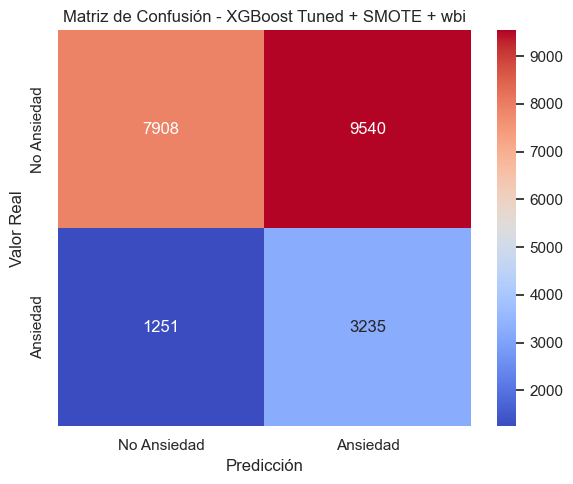


Reporte de Clasificación - XGBoost Tuned + SMOTE + wbi:
              precision    recall  f1-score   support

 No Ansiedad       0.86      0.45      0.59     17448
    Ansiedad       0.25      0.72      0.37      4486

    accuracy                           0.51     21934
   macro avg       0.56      0.59      0.48     21934
weighted avg       0.74      0.51      0.55     21934



In [19]:

df_clean = pd.read_csv('wgm_full_wave2_public_file_final.csv')


df_clean = map_variables(df_clean)

# --- 2. Filtrar respuestas válidas en MH7A ---
df_clean = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 3. Crear dataset de modelado incluyendo 'wbi' ---
features_ampliadas = [
    'Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income',
    'EMP_2010', 'Global11Regions', 'wbi'
]

df_model_ampliado = df_clean[features_ampliadas + ['MH7A']]

# --- 4. Binarizar la variable objetivo ---
mh7a_mapping = {'Yes': 1, 'No': 0}
df_model_ampliado['target'] = df_model_ampliado['MH7A'].map(mh7a_mapping)
df_model_ampliado = df_model_ampliado.drop(columns=['MH7A'])

# --- 5. Codificar variables categóricas ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Education', 'Household_Income', 'Subjective_Income',
            'EMP_2010', 'Global11Regions', 'wbi']:
    df_model_ampliado[col] = le.fit_transform(df_model_ampliado[col])

# --- 6. División de datos ---
from sklearn.model_selection import train_test_split
X = df_model_ampliado.drop(columns='target')
y = df_model_ampliado['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 7. Aplicar SMOTE ---
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- 8. Entrenar XGBoost Tuned ---
from xgboost import XGBClassifier

xgb_tuned_ampliado = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=300,
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])
)

xgb_tuned_ampliado.fit(X_train_balanced, y_train_balanced)

# --- 9. Predecir y evaluar ---
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_probs = xgb_tuned_ampliado.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_probs >= threshold).astype(int)

# --- Matriz de Confusión ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost Tuned + SMOTE + wbi')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# --- Reporte de Clasificación ---
print("\nReporte de Clasificación - XGBoost Tuned + SMOTE + wbi:")
print(classification_report(y_test, y_pred, target_names=['No Ansiedad', 'Ansiedad']))


C:\Users\abiel\AppData\Local\Temp\ipykernel_2508\3119326968.py:1: DtypeWarning: Columns (9,11,13,20,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,71,72,73,74,75,76,84,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean = pd.read_csv('wgm_full_wave2_public_file_final.csv')
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:14:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


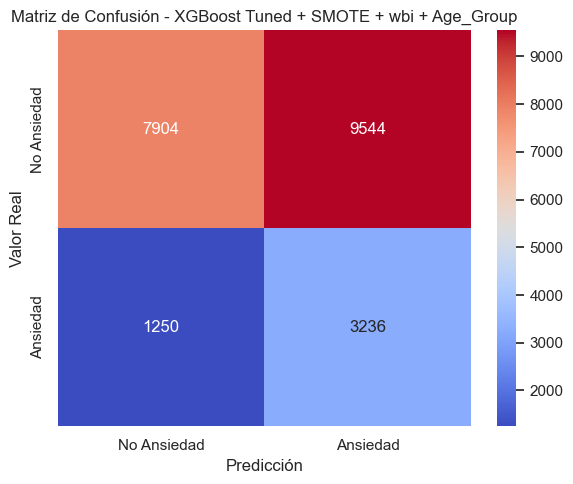


Reporte de Clasificación - XGBoost Tuned + SMOTE + wbi + Age_Group:
              precision    recall  f1-score   support

 No Ansiedad       0.86      0.45      0.59     17448
    Ansiedad       0.25      0.72      0.37      4486

    accuracy                           0.51     21934
   macro avg       0.56      0.59      0.48     21934
weighted avg       0.74      0.51      0.55     21934



In [20]:


df_clean = pd.read_csv('wgm_full_wave2_public_file_final.csv')

bins = [15, 24, 34, 49, 64, 100]
labels = ['15-24', '25-34', '35-49', '50-64', '65+']
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=True)


# --- 1. Asegurar mapeo y filtrado de datos originales ---
df_clean = map_variables(df_clean)

# Filtrar solo respuestas válidas
df_clean = df_clean[df_clean['MH7A'].isin(['Yes', 'No'])]

# --- 2. Crear df_model incluyendo 'wbi' y 'Age_Group' ---
features_ampliadas = [
    'Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income',
    'EMP_2010', 'Global11Regions', 'wbi', 'Age_Group'
]

df_model = df_clean[features_ampliadas + ['MH7A']].copy()

# --- 3. Binarizar variable objetivo ---
mh7a_mapping = {'Yes': 1, 'No': 0}
df_model['target'] = df_model['MH7A'].map(mh7a_mapping)
df_model = df_model.drop(columns=['MH7A'])

# --- 4. Codificar variables categóricas ---
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Education', 'Household_Income', 'Subjective_Income',
            'EMP_2010', 'Global11Regions', 'wbi', 'Age_Group']:
    df_model[col] = le.fit_transform(df_model[col])

# --- 5. División de datos ---
from sklearn.model_selection import train_test_split
X = df_model.drop(columns='target')
y = df_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 6. Aplicar SMOTE ---
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# --- 7. Entrenar XGBoost Tuned ---
from xgboost import XGBClassifier

xgb_tuned_ampliado = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=4,
    learning_rate=0.1,
    n_estimators=300,
    scale_pos_weight=len(y_train_balanced[y_train_balanced == 0]) / len(y_train_balanced[y_train_balanced == 1])
)

xgb_tuned_ampliado.fit(X_train_balanced, y_train_balanced)

# --- 8. Predecir y evaluar ---
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_probs = xgb_tuned_ampliado.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred = (y_probs >= threshold).astype(int)

# --- Matriz de Confusión ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Ansiedad', 'Ansiedad'],
            yticklabels=['No Ansiedad', 'Ansiedad'])
plt.title('Matriz de Confusión - XGBoost Tuned + SMOTE + wbi + Age_Group')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# --- Reporte de Clasificación ---
print("\nReporte de Clasificación - XGBoost Tuned + SMOTE + wbi + Age_Group:")
print(classification_report(y_test, y_pred, target_names=['No Ansiedad', 'Ansiedad']))


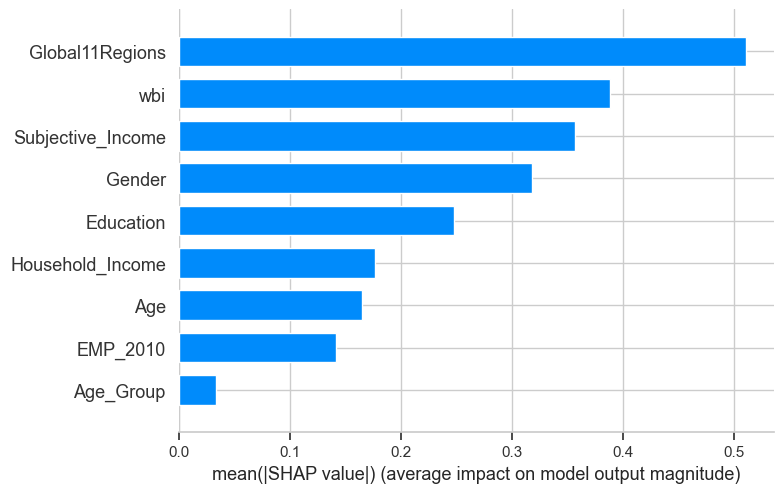


Predicción para muestra individual:
Age                  20
Gender                1
Education             1
Household_Income      1
Subjective_Income     2
EMP_2010              1
Global11Regions       5
wbi                   1
Age_Group             0
Name: 50583, dtype: int64


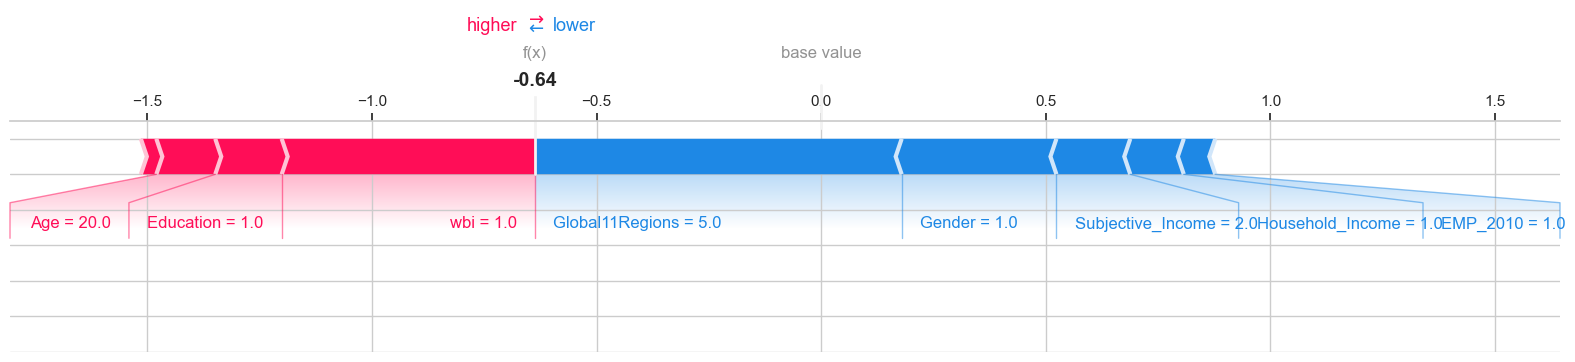

In [21]:
# --- 1. Importar librerías necesarias ---
import shap
import matplotlib.pyplot as plt


# --- 2. Crear explainer de SHAP ---
explainer = shap.TreeExplainer(xgb_tuned_ampliado)

# --- 3. Calcular los SHAP values sobre el test set ---
shap_values = explainer.shap_values(X_test)

# --- 4. Feature Importance Global (ranking de importancia de variables) ---
plt.title('Importancia Global de Variables (SHAP)')
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

# --- 5. Interpretación local para un ejemplo específico ---
# (Podemos analizar una predicción individual)
sample_index = 0  # Cambia este número si quieres analizar otros ejemplos

print("\nPredicción para muestra individual:")
print(X_test.iloc[sample_index])

shap.force_plot(
    explainer.expected_value,
    shap_values[sample_index, :],
    X_test.iloc[sample_index, :],
    matplotlib=True
)

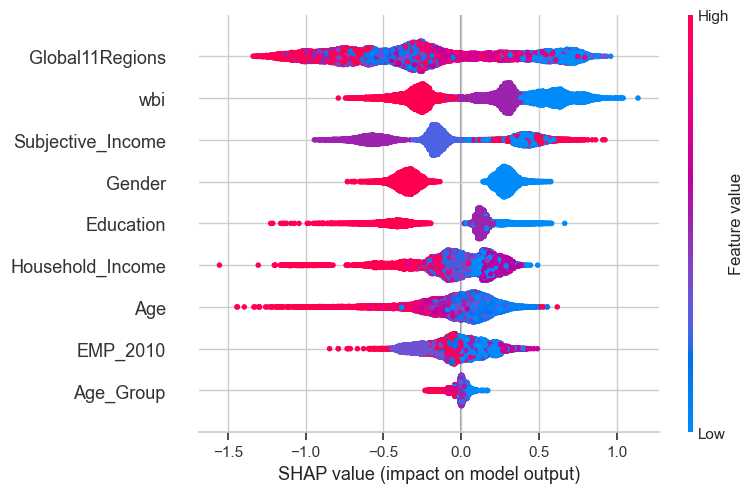

In [22]:
shap.summary_plot(shap_values, X_test, plot_type="dot")

In [46]:
import lime
import lime.lime_tabular
import numpy as np

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_balanced),
    feature_names=X_train_balanced.columns.tolist(),
    class_names=['No Ansiedad', 'Ansiedad'],
    mode='classification'
)

sample_index = 0  
sample = X_test.iloc[sample_index]

exp = explainer_lime.explain_instance(
    data_row=sample,
    predict_fn=xgb_tuned_ampliado.predict_proba
)

exp.show_in_notebook(show_table=True)
# (Si estás en Jupyter Notebook)

print(exp.as_list())


C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\abiel\AppData\Roaming\Python\Python312\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

[('wbi <= 1.00', 0.2654978858110337), ('Education <= 1.00', 0.14248107522429), ('0.00 < Gender <= 1.00', -0.10420344734367767), ('1.00 < Global11Regions <= 6.00', -0.08456301760864574), ('Subjective_Income <= 2.00', 0.06969547941468139), ('Household_Income <= 1.00', 0.03663665290690183), ('Age <= 25.00', 0.026719710135265185), ('Age_Group <= 1.00', -0.0072799050789608835), ('0.00 < EMP_2010 <= 2.00', -0.0019287834293852005)]


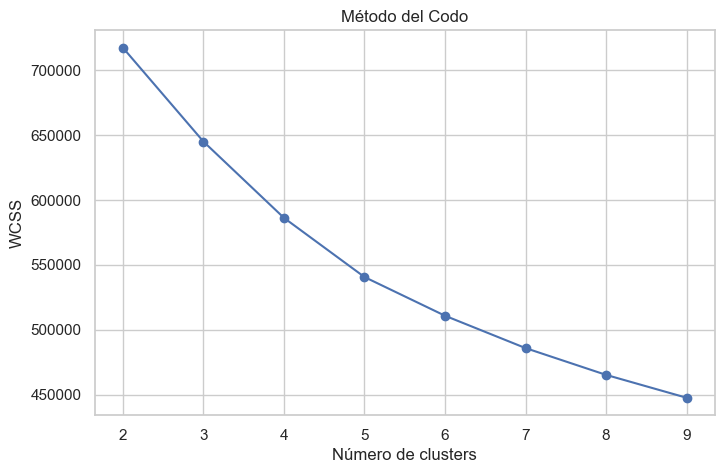

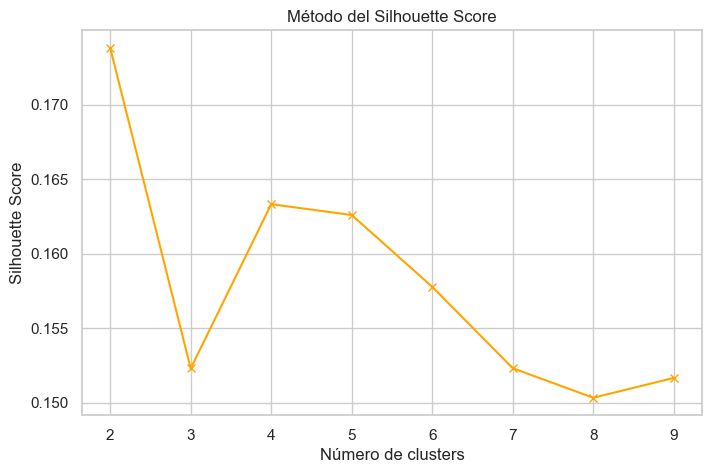

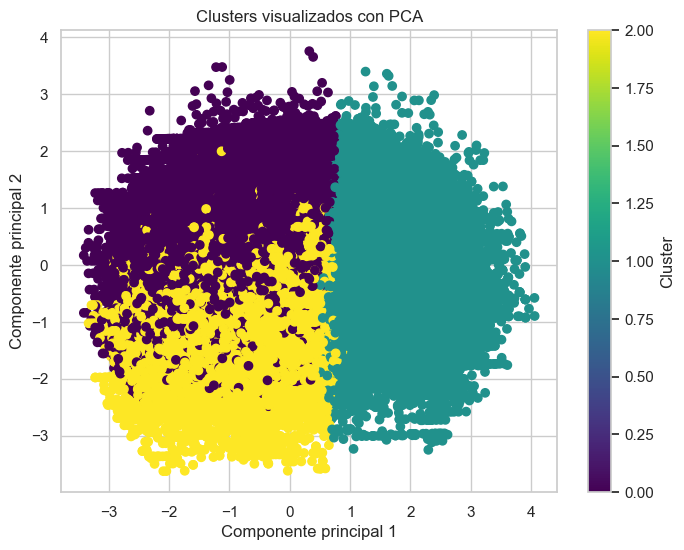

In [48]:
# --- 1. Importar librerías necesarias ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# --- 2. Seleccionar variables relevantes ---
# (Puedes ajustar las columnas si quieres afinar más)
features_clustering = [
    'Age', 'Gender', 'Education', 'Household_Income', 'Subjective_Income',
    'EMP_2010', 'Global11Regions', 'wbi'
]
X_cluster = df_model[features_clustering].copy()

# --- 3. Preprocesar datos ---
# Convertir variables categóricas a números
X_cluster_encoded = pd.get_dummies(X_cluster, drop_first=True)

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster_encoded)

# --- 4. Método del Codo para elegir número óptimo de clusters ---
wcss = []  # within-cluster sum of squares
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(2,10), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# --- 5. (Opcional) Método de Silhouette Score ---
silhouette_scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(range(2,10), silhouette_scores, marker='x', color='orange')
plt.title('Método del Silhouette Score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

n_clusters_optimo = 3  

kmeans_final = KMeans(n_clusters=n_clusters_optimo, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

df_model['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.title('Clusters visualizados con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
